In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
#import plotly.express as px
from sklearn.linear_model import LinearRegression
import pylab as pl

In [4]:
def merge_csv(files, *args):
    return pd.concat([pd.read_csv(f,*args,low_memory=False).set_index('UNITID') \
                      for f in files],axis=1).reset_index()
df = merge_csv(sorted(glob.glob('./*.csv')))

In [5]:
sorted(glob.glob('./*.csv'))

['./2008_2009.csv',
 './2009_2010.csv',
 './2010_2011.csv',
 './2011_2012.csv',
 './2012_2013.csv',
 './2013_2014.csv',
 './2014_2015.csv',
 './2015_2016.csv',
 './2016_2017.csv',
 './2017_2018.csv']

In [6]:
#Differentiating columns with same name
cols = []
count = 1
for column in df.columns:
    if column == 'PREDDEG':
        cols.append('PREDDEG_'+str(count))
        count+=1
        continue
    cols.append(column)
df.columns = cols


df_sat = df[['UNITID','PREDDEG_1','SAT_AVG','C200_4']]
df_sat = df_sat.loc[df_sat['PREDDEG_1']==3]
df_sat = df_sat.drop(columns = ['PREDDEG_1']).dropna()

#renaming columns
renamed_columns = ['school_id']
for i in range(2008,2018,1):
    sat_column = f'{i}-{i+1}_SAT'
    renamed_columns.append(sat_column)
for i in range(2008,2018,1): 
    completion_column = f'{i}-{i+1}_completion'
    renamed_columns.append(completion_column)

df_sat.columns = renamed_columns

In [7]:
df_sat.head()

,school_id,2008-2009_SAT,2009-2010_SAT,2010-2011_SAT,2011-2012_SAT,2012-2013_SAT,2013-2014_SAT,2014-2015_SAT,2015-2016_SAT,2016-2017_SAT,...,2008-2009_completion,2009-2010_completion,2010-2011_completion,2011-2012_completion,2012-2013_completion,2013-2014_completion,2014-2015_completion,2015-2016_completion,2016-2017_completion,2017-2018_completion
0,100654,870.0,851.0,849.0,846.0,847.0,823.0,827.0,850.0,849.0,...,0.7461,0.4682,0.4554,0.3551,0.3514,0.3520,0.3389,0.3265,0.3755,0.3503
1,100663,1108.0,1107.0,1108.0,1107.0,1107.0,1146.0,1107.0,1147.0,1125.0,...,0.4033,0.4203,0.4313,0.4377,0.4583,0.4881,0.5243,0.5661,0.5936,0.5767
3,100706,1123.0,1145.0,1163.0,1164.0,1162.0,1180.0,1219.0,1221.0,1257.0,...,0.4734,0.4932,0.5098,0.5207,0.4839,0.5048,0.5169,0.5257,0.5098,0.5297
4,100724,762.0,805.0,742.0,783.0,827.0,830.0,851.0,844.0,825.0,...,0.3176,0.3389,0.2370,0.2578,0.2856,0.3013,0.2904,0.2865,0.2865,0.2994
5,100751,1102.0,1122.0,1155.0,1158.0,1172.0,1171.0,1185.0,1181.0,1202.0,...,0.6580,0.6791,0.6779,0.6906,0.6983,0.6837,0.6875,0.6890,0.6782,0.6906


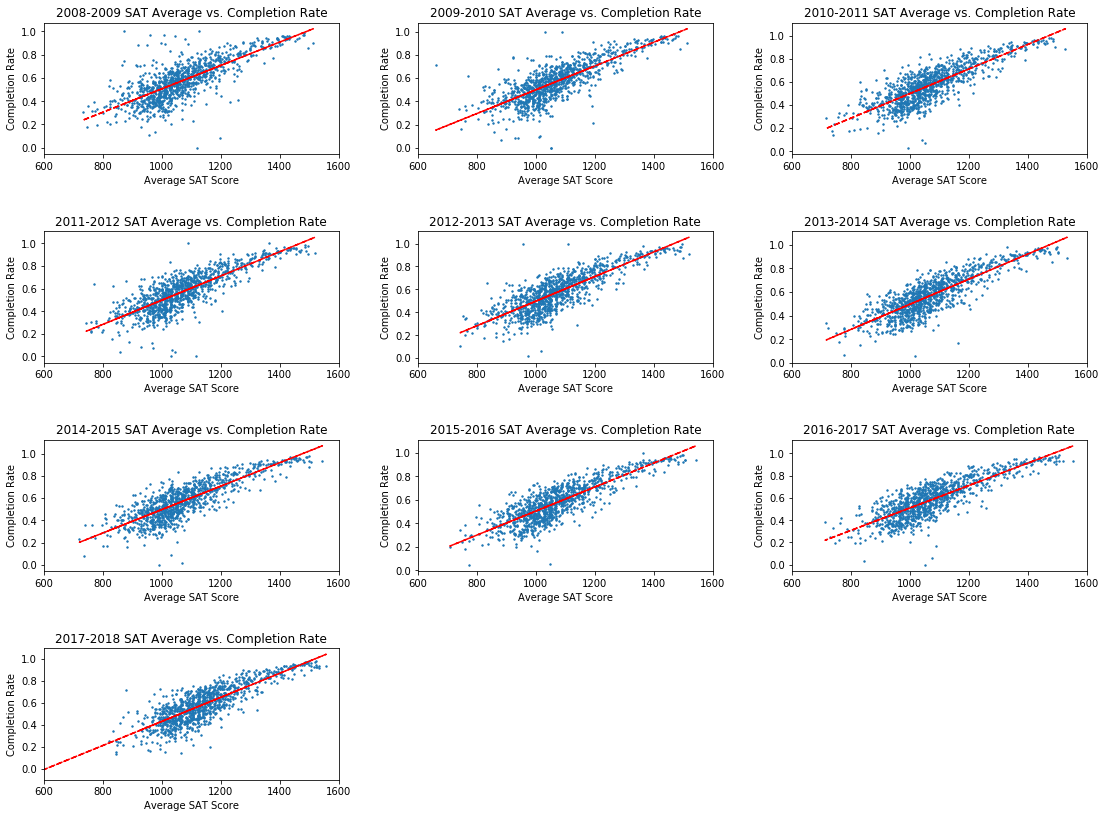

In [145]:
# Scatter Plots 
x = []
y = []

for i in range(2008,2018,1):
    sub_x = df_sat[f'{i}-{i+1}_SAT'].tolist()
    x.append(sub_x)
for i in range(2008,2018,1):
    sub_y = df_sat[f'{i}-{i+1}_completion'].tolist()
    y.append(sub_y)

a=1
year = 2008
num=0
plt.figure(figsize=(16,12))
for i,j in zip(x,y):
    plt.subplot(4,3,a)
    plt.scatter(i,j,s=2)
    plt.title(f'{year}-{year+1} SAT Average vs. Completion Rate')
    plt.xlabel('Average SAT Score')
    plt.ylabel('Completion Rate')
    plt.xlim(600,1600)
    plt.tight_layout(pad = 3)
    
    z = np.polyfit(x[num], y[num], 1)
    p = np.poly1d(z)
    plt.plot(x[num],p(x[num]),"r--")
        
    
    year += 1
    a += 1
    num += 1
plt.savefig(fname = 'sat_success_rate.eps',format='eps',dpi=1000)

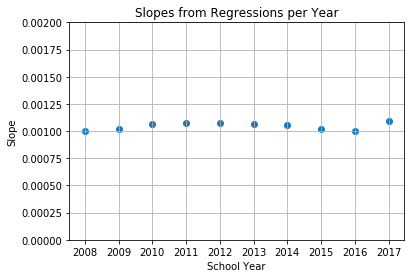

In [150]:
x_vals = []
y_vals = []
linreg = LinearRegression()
regs = []
slopes = []
r_squared = []

count = 0
for n in range(0,10,1):
    x_sub = np.array(x[n]).reshape(-1,1)
    y_sub = y[n]
    x_vals.append(x_sub)
    y_vals.append(y_sub)
    reg = linreg.fit(x_sub,y_sub)
    regs.append(reg)
    m = linreg.coef_.tolist()[0]
    slopes.append(m)
    rsq = linreg.score(x_sub,y_sub)
    r_squared.append(rsq)
    count += 1

x_vals = np.arange(len(slopes))
plt.scatter(x_vals,slopes)
plt.title('Slopes from Regressions per Year')
plt.xticks(np.arange(10),('2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'))
plt.xlabel('School Year')
plt.ylabel('Slope')
plt.ylim(0,0.002)
plt.grid()
plt.savefig(fname='slopes_over_time.eps',format='eps',dpi=1000)

In [128]:
# print(list(map(float,slopes)))
print(list(map(float,r_squared)))

[0.5739194121074301, 0.618636095918838, 0.6729401098853272, 0.6532417788069524, 0.6706512830350526, 0.6972616431169569, 0.6843206519435788, 0.7040782048226164, 0.681411220359706, 0.6841546634754547]


In [142]:
r_squared

[0.5739194121074301,
 0.618636095918838,
 0.6729401098853272,
 0.6532417788069524,
 0.6706512830350526,
 0.6972616431169569,
 0.6843206519435788,
 0.7040782048226164,
 0.681411220359706,
 0.6841546634754547]

# Completion Rate per SAT Subcategory

In [57]:
#Differentiating columns with same name

cols = []
count = 1
for column in df.columns:
    if column == 'PREDDEG':
        cols.append('PREDDEG_'+str(count))
        count+=1
        continue
    cols.append(column)
df.columns = cols

df_cat = df[['UNITID','PREDDEG_1','SATVRMID','SATMTMID','C200_4']]
df_cat = df_cat.loc[df_cat['PREDDEG_1']==3]
df_cat = df_cat.drop(columns = ['PREDDEG_1']).dropna()

#Renaming columns

#renaming columns
renamed_columns = ['school_id']
for i in range(2008,2018,1):
    cat_reading = f'{i}-{i+1}_critical_reading'
    renamed_columns.append(cat_reading)
for i in range(2008,2018,1): 
    cat_math = f'{i}-{i+1}_math'
    renamed_columns.append(cat_math)
for i in range(2008,2018,1): 
    completion_rate = f'{i}-{i+1}_completion'
    renamed_columns.append(completion_rate)
df_cat.columns = renamed_columns
df_cat = df_cat.sort_index(axis=1)
df_cat.head()

,2008-2009_completion,2008-2009_critical_reading,2008-2009_math,2009-2010_completion,2009-2010_critical_reading,2009-2010_math,2010-2011_completion,2010-2011_critical_reading,2010-2011_math,2011-2012_completion,...,2015-2016_completion,2015-2016_critical_reading,2015-2016_math,2016-2017_completion,2016-2017_critical_reading,2016-2017_math,2017-2018_completion,2017-2018_critical_reading,2017-2018_math,school_id
1,0.4033,570.0,580.0,0.4203,555.0,575.0,0.4313,585.0,600.0,0.4377,...,0.5661,575.0,594.0,0.5936,560.0,575.0,0.5767,535.0,645.0,100663
3,0.4734,550.0,565.0,0.4932,565.0,580.0,0.5098,570.0,583.0,0.5207,...,0.5257,585.0,615.0,0.5098,590.0,610.0,0.5297,605.0,600.0,100706
4,0.3176,390.0,380.0,0.3389,400.0,405.0,0.2370,400.0,370.0,0.2578,...,0.2865,410.0,410.0,0.2865,415.0,410.0,0.2994,433.0,428.0,100724
5,0.6580,545.0,550.0,0.6791,555.0,560.0,0.6779,555.0,560.0,0.6906,...,0.6890,545.0,550.0,0.6782,550.0,555.0,0.6906,585.0,580.0,100751
9,0.6527,570.0,600.0,0.6432,580.0,600.0,0.6739,595.0,610.0,0.7029,...,0.7080,580.0,595.0,0.7373,575.0,585.0,0.7494,610.0,610.0,100858


In [86]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm


X = df_cat.iloc[:,[1,2]].values
y = df_cat.iloc[:,0].values

regressor = LinearRegression()
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# regressor.fit(X_train,y_train)
# y_pred = regressor.predict(X_test)
X = np.append(arr=np.ones((866,1)).astype(int), values=X ,axis=1)

X_opt = X[:,[0,1,2]]
regressor_ols=sm.OLS(endog=y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     700.3
Date:                Sat, 03 Aug 2019   Prob (F-statistic):          1.97e-181
Time:                        22:26:09   Log-Likelihood:                 724.98
No. Observations:                 866   AIC:                            -1444.
Df Residuals:                     863   BIC:                            -1430.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4631      0.028    -16.340      0.000      -0.519      -0.408
x1             0.0009      0.000      5.353      0.000       0.001       0.001
x2             0.0010      0.000      6.182      0.000       0.001       0.001
==============================================================================
Omnibus:                       87.124   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.513
Skew:                          -0.118   Prob(JB):                    3.54e-124
Kurtosis:                       6.962   Cond. No.                     6.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
regressor_ols.bse

array([0.02808287, 0.00014632, 0.00013499])

In [109]:
params_list = []
for num in range(0,28,3):
    X = df_cat.iloc[:,[num+1,num+2]].values
    y = df_cat.iloc[:,num].values
    X = np.append(arr=np.ones((866,1)).astype(int), values=X ,axis=1)
    X_opt = X[:,[0,1,2]]
    regressor_ols=sm.OLS(endog=y,exog=X_opt).fit()
    coef = regressor_ols.params.tolist()
    params_list.append(coef)

In [110]:
params_list

[[-0.46314782014164346, 0.0009260367383792172, 0.0010231768936362665],
 [-0.4627219529115008, 0.0009426852490536571, 0.001001069427878481],
 [-0.5080644275230326, 0.0008645196666399217, 0.001167953129269643],
 [-0.5071083589525779, 0.0010680685595343535, 0.0009727249204369249],
 [-0.5056497832043958, 0.0008206632119558074, 0.0012133915717598659],
 [-0.4975682992145868, 0.0007925446623003558, 0.0012287055902403482],
 [-0.48727641165986424, 0.001090289060008462, 0.0009210716354544831],
 [-0.4509501706525144, 0.0009590506960182094, 0.0009933728488252139],
 [-0.45047591325185093, 0.001062574501205928, 0.0008992896060896042],
 [-0.5944059747718192, 0.0008734820800308396, 0.0012413148287543042]]

In [155]:
slopes

[0.0010035713988507842,
 0.0010206187713216583,
 0.0010613597337543656,
 0.0010712348503932898,
 0.001072787764141479,
 0.0010618496850182057,
 0.0010530508327104276,
 0.001020842177432754,
 0.0010046105365745705,
 0.0010929714204447908]

In [159]:
file = pd.read_csv('2008_2009.csv',low_memory=False)

In [162]:
file

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,00100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,00105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,02503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,00105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,00100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100751,00105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100760,00100700,1007,Central Alabama Community College,Alexander City,AL,35010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100812,00100800,1008,Athens State University,Athens,AL,35611,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100830,00831000,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100858,00100900,1009,Auburn University,Auburn,AL,36849,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
